In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os, json
from os.path import dirname
from pandas import DataFrame, concat
from tqdm import tqdm
import seaborn as sns 


from parse_mrst import get_data as get_mrst


In [35]:
dir = '../data/data_july_24/'
mrst_files = glob('{}s*_mrst_*[0-9]'.format(dir))
mrst_files2 = glob('{}s*_mrst_*[0-9].json'.format(dir))

for i in mrst_files2 :
    mrst_files.append(i)

mrst_data = get_mrst(mrst_files, 22)


  0%|          | 0/29 [00:00<?, ?it/s]/Users/gilikarni/Documents/code/CRCRNS-geha/analysis/parse_mrst.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['missing'] = data['missing'].astype(int)
  3%|▎         | 1/29 [00:00<00:06,  4.12it/s]/Users/gilikarni/Documents/code/CRCRNS-geha/analysis/parse_mrst.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['missing'] = data['missing'].astype(int)
  7%|▋         | 2/29 [00:00<00:06,  4.07it/s]/Users/gilikarni/Documents/code/CRCRNS-geha/analysis/par

In [15]:
import re

user_id = r's\d{1,3}'

In [29]:
mrst_comprehension = np.zeros((len(mrst_files),5))

for ind, f in enumerate(mrst_files):
        # print (f[22:25])
        ## Define subject
        subject = re.search(user_id,f)[0]#f[20:23]
        ## Load JSON.
        with open(f, 'r') as tmp:
            JSON = json.load(tmp)
        
        mrst_comprehension[ind][0] = subject

        for i in JSON:
            if i["trial_type"] == "mrst-comprehension'":
                if i['quiz']=='1a':
                    mrst_comprehension[ind][1] += i['num_errors']
                if i['quiz']=='1b':
                    mrst_comprehension[ind][2] += i['num_errors']
                if i['quiz']=='1c':
                    mrst_comprehension[ind][3] += i['num_errors']
                if i['quiz']=='1d':
                    mrst_comprehension[ind][4] += i['num_errors']
                # print(subject, i['quiz'], i['num_errors'], i['rt'])
        

ValueError: could not convert string to float: 's108'

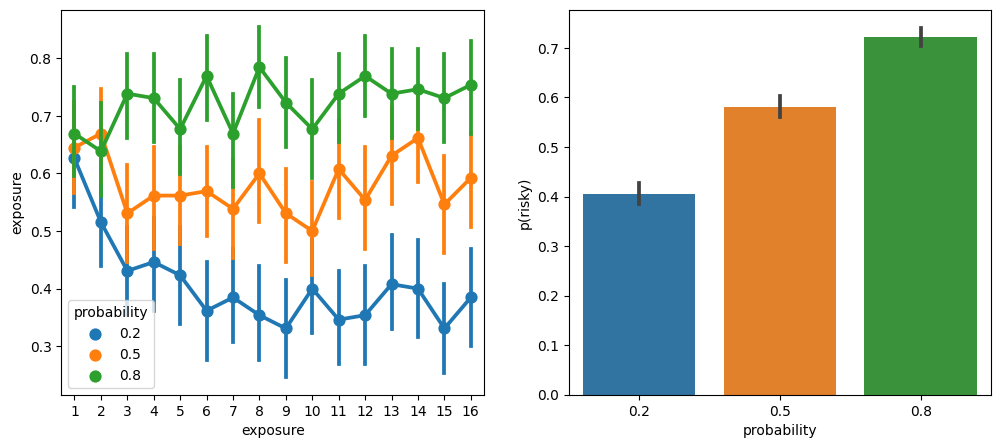

In [39]:
### MRST MAIN EFFECTS

## Plot learning curves.
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.pointplot(x='exposure', y='choice', 
              hue='probability', 
              data=mrst_data[(mrst_data.missing==0) & (mrst_data.exposure<=16)], 
              hue_order=[0.2,0.5,0.8],
              ax=ax[0])
ax[0].set_ylabel('p(risky)')
ax[0].set_ylabel('exposure')


#plt over all risky choice

sns.barplot(x='probability', y='choice', 
            data=mrst_data[(mrst_data.missing==0) & (mrst_data.exposure<=16)], 
            hue_order=[0.2,0.5,0.8],
            ax=ax[1])
ax[1].set_ylabel('p(risky)')
ax[1].set_xlabel('probability')
plt.show()


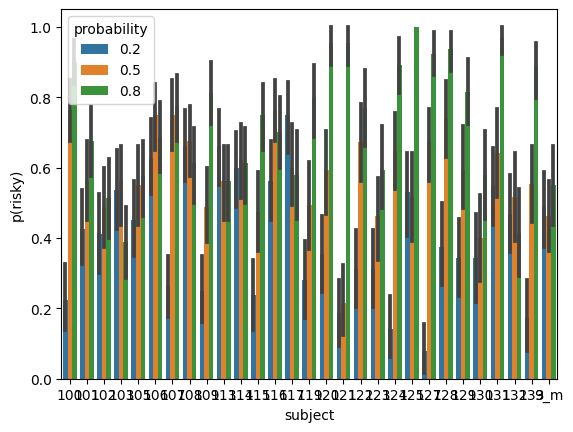

In [38]:
### MRST MAIN EFFECTS / per subject
sns.barplot(x='subject', y='choice', 
            data=mrst_data[(mrst_data.missing==0) & (mrst_data.exposure<=16)], 
            hue='probability',
            hue_order=[0.2,0.5,0.8])
plt.xlabel('subject')
plt.ylabel('p(risky)')
plt.show()